In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings

In [2]:
def get_full_df(file_names, years, data_path, column_names):
    dfs = []
    i = 0
    for file in file_names:
        df = pd.read_csv(data_path + file, index_col= None, usecols= column_names, low_memory= False, encoding='utf-8')
        df['year'] = years[i]
        i += 1
        dfs.append(df)

    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

def select_colleges(df, college_list):
    dfs = []
    for college in college_list:
        dfs.append(df.loc[df['INSTNM'] == college])
    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

def mn_gt_0(x):
    if np.isnan(x).all():
        return np.nan
    else:
        with warnings.catch_warnings():
            warnings.filterwarnings('error')
            try:
                return np.nanmean([i for i in x if i > 0])
            except RuntimeWarning:
                return np.nan

def state_group_avg(df):
    i_df = df.copy()
    for col in i_df.columns:
        if i_df[col].isna().sum():
            i_df[col] = i_df.groupby('STABBR')[col].apply(lambda x: x.fillna(np.mean(x)))
    return i_df

def inst_abv_0_group_avg(df):
    i_df = df.copy()
    for col in i_df.columns:
        if i_df[col].isna().sum():
            i_df[col] = i_df.groupby('INSTNM')[col].apply(lambda x: x.fillna(mn_gt_0(x)))
    return i_df

data_path = '/mnt/d/Downloads/CollegeScorecard_Raw_Data_01192021/Raw Data Files/'

merged_file_names = ['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 
                     'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 
                     'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 
                     'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 
                     'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']
merged_years = list(range(1996, 2019))
merged_cols = pd.read_csv(data_path + 'MERGED1996_97_PP.csv', index_col=0, nrows=0).columns.tolist()

field_file_names = ['FieldOfStudyData1415_1516_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'Most-Recent-Cohorts-Field-of-Study.csv']
field_years = list(range(2016, 2019))
field_cols = pd.read_csv(data_path + 'FieldOfStudyData1415_1516_PP.csv', index_col=0, nrows=0).columns.tolist()

price_file_names = ['MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 
                    'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 
                    'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']
price_years = list(range(2009, 2019))

base_cols = ['UNITID', 'OPEID6', 'INSTNM']
colleges = ["University of Colorado Boulder", "University of San Diego", "University of California-Los Angeles", "New York University", "The University of Texas at Austin"]

model_cols = ['MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 
             'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 
             'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 
             'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 
             'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 
             'UGDS', 'TUITFTE', 'INEXPFTE', 'PCTPELL', 'COSTT4_A', 
             'COSTT4_P', 'C150_4', 'C150_L4', 'PCTFLOAN', 'AGE_ENTRY', 
             'VETERAN', 'FIRST_GEN', 'POVERTY_RATE', 'UNEMP_RATE', 'STABBR', 'INSTNM',
             'OPENADMP', 'LPSTAFFORD_CNT', 'LPSTAFFORD_AMT', 'LPPPLUS_CNT', 'LPPPLUS_AMT' ]

In [307]:
t_df = full_df.copy()

In [310]:
inst_df = inst_abv_0_group_avg(full_df)

INSTNM 0
MAIN 0
NUMBRANCH 0
PREDDEG 0
HIGHDEG 0
PCIP01 0
PCIP03 0
PCIP04 0
PCIP05 0
PCIP09 0
PCIP10 0
PCIP11 0
PCIP12 0
PCIP13 0
PCIP14 0
PCIP15 0
PCIP16 0
PCIP19 0
PCIP22 0
PCIP23 0
PCIP24 0
PCIP25 0
PCIP26 0
PCIP27 0
PCIP29 0
PCIP30 0
PCIP31 0
PCIP38 0
PCIP39 0
PCIP40 0
PCIP41 0
PCIP42 0
PCIP43 0
PCIP44 0
PCIP45 0
PCIP46 0
PCIP47 0
PCIP48 0
PCIP49 0
PCIP50 0
PCIP51 0
PCIP52 0
PCIP54 0
UGDS 139
COSTT4_A 57672
COSTT4_P 99494
TUITFTE 982
INEXPFTE 951
PCTPELL 8634
C150_4 89210
C150_L4 52726
PCTFLOAN 15490
AGE_ENTRY 2005
VETERAN 44122
FIRST_GEN 8972
POVERTY_RATE 16134
UNEMP_RATE 16134
OPENADMP 1050
LPSTAFFORD_CNT 42721
LPSTAFFORD_AMT 42721
LPPPLUS_CNT 61681
LPPPLUS_AMT 61681
year 0
STABBR 0


In [312]:
state_group_avg(inst_df)

INSTNM 0
MAIN 0
NUMBRANCH 0
PREDDEG 0
HIGHDEG 0
PCIP01 0
PCIP03 0
PCIP04 0
PCIP05 0
PCIP09 0
PCIP10 0
PCIP11 0
PCIP12 0
PCIP13 0
PCIP14 0
PCIP15 0
PCIP16 0
PCIP19 0
PCIP22 0
PCIP23 0
PCIP24 0
PCIP25 0
PCIP26 0
PCIP27 0
PCIP29 0
PCIP30 0
PCIP31 0
PCIP38 0
PCIP39 0
PCIP40 0
PCIP41 0
PCIP42 0
PCIP43 0
PCIP44 0
PCIP45 0
PCIP46 0
PCIP47 0
PCIP48 0
PCIP49 0
PCIP50 0
PCIP51 0
PCIP52 0
PCIP54 0
UGDS 0
COSTT4_A 0
COSTT4_P 235
TUITFTE 0
INEXPFTE 0
PCTPELL 0
C150_4 73
C150_L4 32
PCTFLOAN 0
AGE_ENTRY 0
VETERAN 46
FIRST_GEN 0
POVERTY_RATE 0
UNEMP_RATE 0
OPENADMP 0
LPSTAFFORD_CNT 140
LPSTAFFORD_AMT 140
LPPPLUS_CNT 140
LPPPLUS_AMT 140
year 0
STABBR 0


,INSTNM,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,...,FIRST_GEN,POVERTY_RATE,UNEMP_RATE,OPENADMP,LPSTAFFORD_CNT,LPSTAFFORD_AMT,LPPPLUS_CNT,LPPPLUS_AMT,year,STABBR
0,Community College of the Air Force,1.0,1.0,2.0,2.0,0.0000,0.0000,0.0000,0.0,0.0029,...,0.493651,13.636623,3.959855,1.111111,19693.045359,4.542063e+08,1739.91448,4.721740e+07,1996.0,AL
1,Alabama A & M University,1.0,1.0,3.0,4.0,0.0323,0.0323,0.0068,0.0,0.0000,...,0.389589,15.446667,4.971667,2.000000,31374.000000,9.224563e+08,5201.00000,1.139496e+08,1996.0,AL
2,University of Alabama at Birmingham,1.0,2.0,3.0,4.0,0.0000,0.0000,0.0000,0.0,0.0263,...,0.374598,11.066667,3.485000,2.000000,56997.000000,1.720042e+09,3727.00000,8.742188e+07,1996.0,AL
3,ALABAMA AVIATION AND TECHNICAL COLLEGE,1.0,1.0,1.0,2.0,0.0000,0.0000,0.0000,0.0,0.0000,...,0.540000,10.210000,3.870000,1.457955,19693.045359,4.542063e+08,1739.91448,4.721740e+07,1996.0,AL
4,Amridge University,1.0,1.0,3.0,4.0,0.0000,0.0000,0.0000,0.0,0.0000,...,0.529701,9.955000,3.565000,1.210526,4463.000000,1.742220e+08,16.00000,3.096180e+05,1996.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162851,Gould's Academy,0.0,2.0,1.0,1.0,0.0000,0.0000,0.0000,0.0,0.0000,...,0.382787,11.217917,3.622817,1.000000,782.000000,5.794614e+06,52.00000,3.370940e+05,2018.0,TN
162852,Stanbridge University-Los Angeles,0.0,2.0,2.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,...,0.507633,11.796177,4.578757,2.000000,5400.000000,9.948650e+07,514.00000,8.597664e+06,2018.0,CA
162853,Toni & Guy Hairdressing Academy-Rio Rancho,0.0,2.0,1.0,1.0,0.0000,0.0000,0.0000,0.0,0.0000,...,0.480573,14.831490,4.487665,1.000000,909.000000,1.013078e+07,73.00000,4.286910e+05,2018.0,NM
162854,Career Quest Learning Center-Bay City Branch,0.0,4.0,1.0,1.0,0.0000,0.0000,0.0000,0.0,0.0000,...,0.490125,8.913751,4.046421,1.000000,6603.000000,6.710005e+07,197.00000,1.325679e+06,2018.0,MI


In [296]:
t_df.loc[t_df['INSTNM'] == 'Community College of the Air Force'][col]

0        44141.0
7007     41694.0
27252    42917.5
33906        0.0
47283        0.0
60703        0.0
67602        0.0
74553        0.0
81524        0.0
88579        0.0
95796        0.0
Name: UGDS, dtype: float64

In [92]:
df = pd.read_csv(data_path + 'Most-Recent-Cohorts-All-Data-Elements.csv', index_col= None, usecols= model_cols, low_memory= False, encoding='utf-8')

In [102]:
df.loc[df['PCIP01'].isna()].head()

,INSTNM,STABBR,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,PCIP01,PCIP03,PCIP04,PCIP05,...,AGE_ENTRY,VETERAN,FIRST_GEN,POVERTY_RATE,UNEMP_RATE,OPENADMP,LPSTAFFORD_CNT,LPSTAFFORD_AMT,LPPPLUS_CNT,LPPPLUS_AMT
85,School of Architecture at Taliesin,AZ,1,1,4,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,56,2395407,PrivacySuppressed,PrivacySuppressed
173,Academy of Chinese Culture and Health Sciences,CA,1,1,4,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,NaN,403,24611120,PrivacySuppressed,PrivacySuppressed
179,American Baptist Seminary of the West,CA,1,1,4,4,NaN,NaN,NaN,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,202,12882058,PrivacySuppressed,PrivacySuppressed
180,American Film Institute Conservatory,CA,1,1,4,4,NaN,NaN,NaN,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,1238,69400831,PrivacySuppressed,PrivacySuppressed
202,University of California-Hastings College of Law,CA,1,1,4,4,NaN,NaN,NaN,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.80000019073486,3.47000002861023,NaN,4968,243550344,PrivacySuppressed,PrivacySuppressed


In [4]:
df.replace('PrivacySuppressed', np.nan, inplace=True)

In [5]:
st = df['STABBR']
df = df.drop('STABBR', axis=1)
for i in df.columns: #to_numeric not working
    try:
        df[i] = df[i].astype(float)
    except:
        pass
df['STABBR'] = st

In [6]:
df.dtypes[df.dtypes == 'object']

STABBR    object
dtype: object

In [7]:
df['avg_cost'] = df['COSTT4_A'].replace(np.nan, 0) + df['COSTT4_P'].replace(np.nan, 0)
df = df.drop(['COSTT4_A', 'COSTT4_P'], axis=1)
df['completion_rate'] = df['C150_4'].replace(np.nan, 0) + df['C150_L4'].replace(np.nan, 0)
df = df.drop(['C150_4', 'C150_L4'], axis=1)

In [8]:
df = df.loc[df['PCIP01'].notna()]

In [9]:
for col in df.columns:
    if df[col].isna().sum():
        df[col] = state_group_avg(df, col)

for col in df.columns:
    print(col, df[col].isna().sum())

MAIN 0
NUMBRANCH 0
PREDDEG 0
HIGHDEG 0
PCIP01 0
PCIP03 0
PCIP04 0
PCIP05 0
PCIP09 0
PCIP10 0
PCIP11 0
PCIP12 0
PCIP13 0
PCIP14 0
PCIP15 0
PCIP16 0
PCIP19 0
PCIP22 0
PCIP23 0
PCIP24 0
PCIP25 0
PCIP26 0
PCIP27 0
PCIP29 0
PCIP30 0
PCIP31 0
PCIP38 0
PCIP39 0
PCIP40 0
PCIP41 0
PCIP42 0
PCIP43 0
PCIP44 0
PCIP45 0
PCIP46 0
PCIP47 0
PCIP48 0
PCIP49 0
PCIP50 0
PCIP51 0
PCIP52 0
PCIP54 0
DISTANCEONLY 0
UGDS 0
TUITFTE 0
INEXPFTE 0
PCTPELL 0
PCTFLOAN 0
AGE_ENTRY 0
VETERAN 6
FIRST_GEN 0
POVERTY_RATE 2
UNEMP_RATE 2
OPENADMP 0
LPSTAFFORD_CNT 5
LPSTAFFORD_AMT 5
LPPPLUS_CNT 5
LPPPLUS_AMT 5
STABBR 0
avg_cost 0
completion_rate 0


In [10]:
df.dropna(inplace=True)

In [11]:
df['avg_stafford'] = df['LPSTAFFORD_AMT'] / df['LPSTAFFORD_CNT']
df['avg_plus'] = df['LPPPLUS_AMT'] / df['LPPPLUS_CNT']
df = df.drop(['LPSTAFFORD_AMT', 'LPSTAFFORD_CNT', 'LPPPLUS_AMT', 'LPPPLUS_CNT', 'STABBR'], axis=1)

<AxesSubplot:>

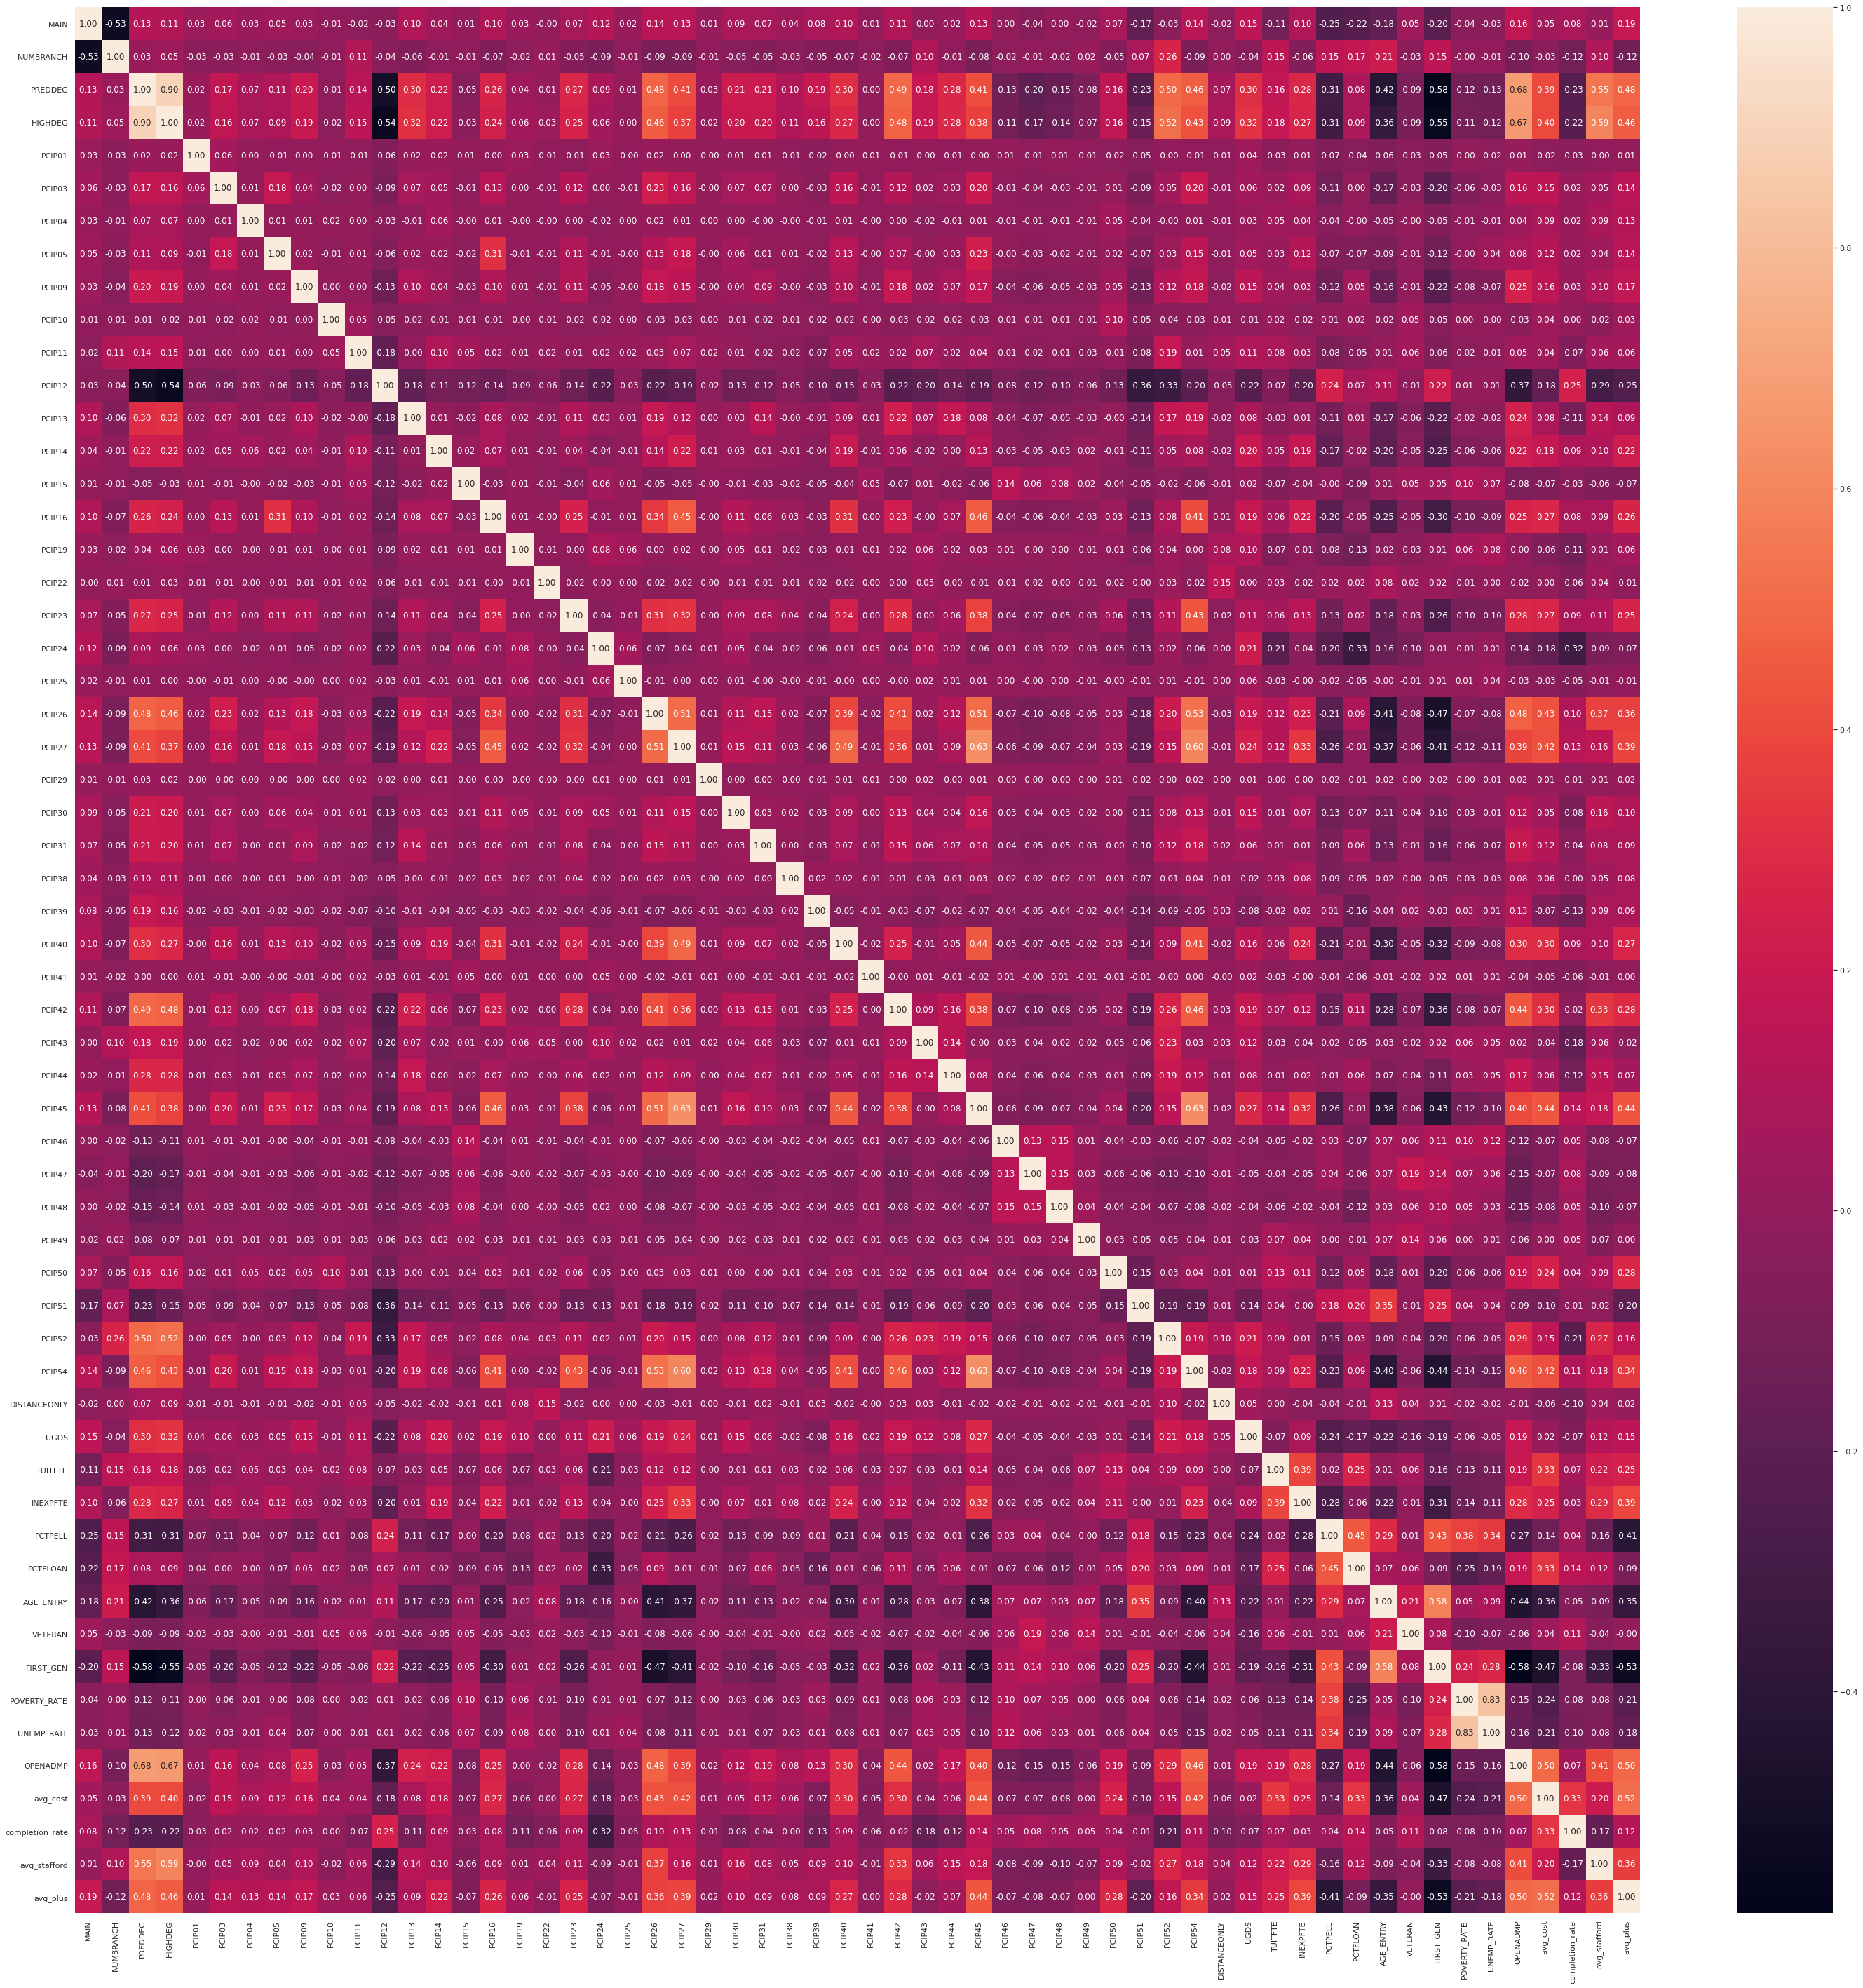

In [12]:
sns.set(rc={'figure.figsize':(50,50)})
sns.heatmap(df.corr(),annot=True, fmt=".2f")

In [13]:
clean_df = pd.get_dummies(df, columns=['PREDDEG', 'HIGHDEG'])


In [14]:
clean_df.head()

,MAIN,NUMBRANCH,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,...,avg_plus,PREDDEG_1.0,PREDDEG_2.0,PREDDEG_3.0,PREDDEG_4.0,HIGHDEG_0.0,HIGHDEG_1.0,HIGHDEG_2.0,HIGHDEG_3.0,HIGHDEG_4.0
0,1.0,1.0,0.0394,0.0237,0.0039,0.0000,0.0000,0.0394,0.0592,0.0,...,21909.162469,0,0,1,0,0,0,0,0,1
1,1.0,1.0,0.0000,0.0000,0.0000,0.0016,0.0375,0.0000,0.0139,0.0,...,23456.366783,0,0,1,0,0,0,0,0,1
2,1.0,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,...,19351.125000,0,0,1,0,0,0,0,0,1
3,1.0,1.0,0.0000,0.0000,0.0000,0.0000,0.0194,0.0000,0.0590,0.0,...,21324.095920,0,0,1,0,0,0,0,0,1
4,1.0,1.0,0.0000,0.0000,0.0000,0.0000,0.0892,0.0000,0.0585,0.0,...,20721.221643,0,0,1,0,0,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split

In [23]:
seed = 123456
X, y = clean_df.drop('completion_rate', axis=1), np.array(clean_df['completion_rate'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [25]:
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.030 seconds


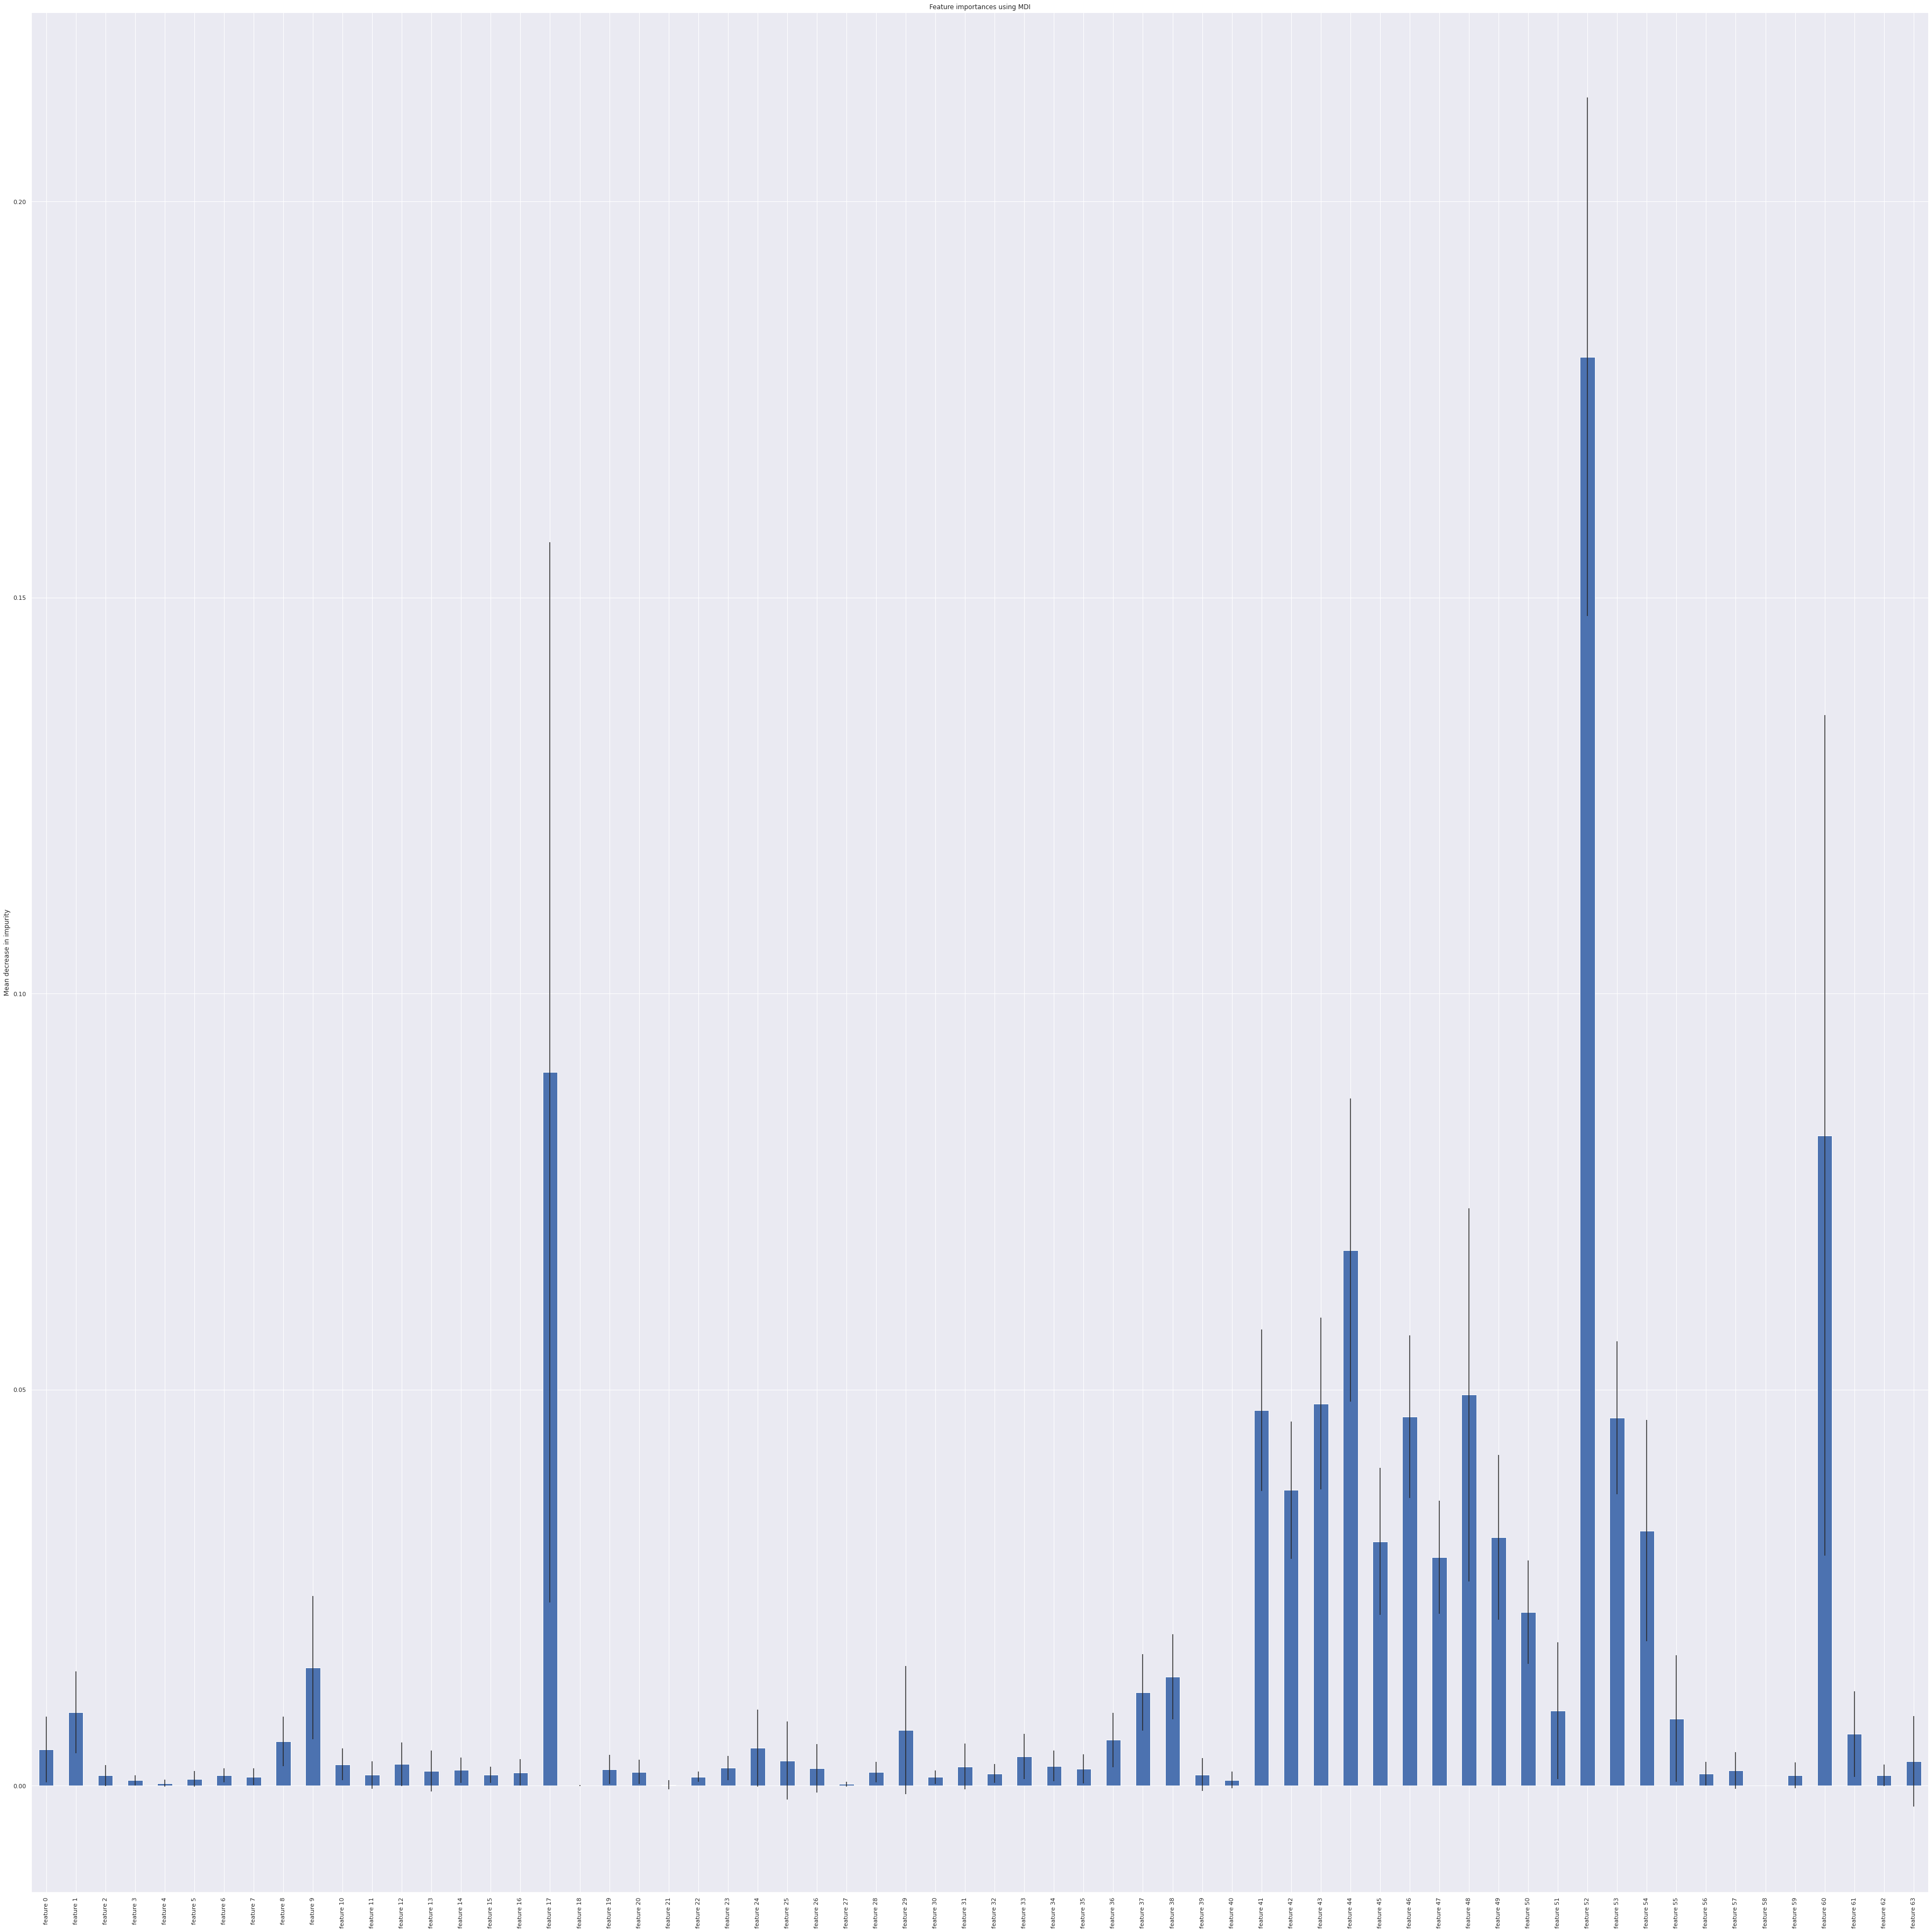

In [26]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [39]:
np.abs(forest.predict(X_test) - y_test)

0.12297633620689653

In [215]:
print(model_cols)

['MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'DISTANCEONLY', 'UGDS', 'TUITFTE', 'INEXPFTE', 'PCTPELL', 'COSTT4_A', 'COSTT4_P', 'C150_4', 'C150_L4', 'PCTFLOAN', 'AGE_ENTRY', 'VETERAN', 'FIRST_GEN', 'POVERTY_RATE', 'UNEMP_RATE', 'STABBR', 'OPENADMP', 'LPSTAFFORD_CNT', 'LPSTAFFORD_AMT', 'LPPPLUS_CNT', 'LPPPLUS_AMT']


In [3]:
full_df = get_full_df(merged_file_names, merged_years, data_path, model_cols)
temp_full_df = full_df.copy()

In [4]:
full_df = temp_full_df.copy()

In [5]:
print(str(list(full_df.columns)))
print(full_df.shape)

['INSTNM', 'STABBR', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'UGDS', 'COSTT4_A', 'COSTT4_P', 'TUITFTE', 'INEXPFTE', 'PCTPELL', 'C150_4', 'C150_L4', 'PCTFLOAN', 'AGE_ENTRY', 'VETERAN', 'FIRST_GEN', 'POVERTY_RATE', 'UNEMP_RATE', 'OPENADMP', 'LPSTAFFORD_CNT', 'LPSTAFFORD_AMT', 'LPPPLUS_CNT', 'LPPPLUS_AMT', 'year']
(163331, 64)


In [6]:
full_df.replace('PrivacySuppressed', np.nan, inplace=True)

In [7]:
st = full_df['STABBR']
full_df = full_df.drop('STABBR', axis=1)
for i in full_df.columns: #to_numeric not working
    try:
        full_df[i] = full_df[i].astype(float)
    except:
        pass
full_df['STABBR'] = st

In [8]:
full_df = full_df.loc[full_df['PCIP01'].notna()]
# full_df = full_df.loc[full_df['avg_cost'] > 0]
# full_df = full_df.loc[full_df['completion_rate'] > 0]

In [9]:
for col in full_df.columns:
    print(col, full_df[col].isna().sum())

INSTNM 0
MAIN 0
NUMBRANCH 0
PREDDEG 0
HIGHDEG 0
PCIP01 0
PCIP03 0
PCIP04 0
PCIP05 0
PCIP09 0
PCIP10 0
PCIP11 0
PCIP12 0
PCIP13 0
PCIP14 0
PCIP15 0
PCIP16 0
PCIP19 0
PCIP22 0
PCIP23 0
PCIP24 0
PCIP25 0
PCIP26 0
PCIP27 0
PCIP29 0
PCIP30 0
PCIP31 0
PCIP38 0
PCIP39 0
PCIP40 0
PCIP41 0
PCIP42 0
PCIP43 0
PCIP44 0
PCIP45 0
PCIP46 0
PCIP47 0
PCIP48 0
PCIP49 0
PCIP50 0
PCIP51 0
PCIP52 0
PCIP54 0
UGDS 6444
COSTT4_A 110497
COSTT4_P 125410
TUITFTE 14817
INEXPFTE 14820
PCTPELL 75809
C150_4 102539
C150_L4 69503
PCTFLOAN 82291
AGE_ENTRY 15460
VETERAN 77836
FIRST_GEN 31854
POVERTY_RATE 114917
UNEMP_RATE 114917
OPENADMP 14398
LPSTAFFORD_CNT 143995
LPSTAFFORD_AMT 143995
LPPPLUS_CNT 145149
LPPPLUS_AMT 145149
year 0
STABBR 0


In [11]:
full_df['avg_cost'] = full_df['COSTT4_A'].fillna(full_df['COSTT4_P'])
full_df = full_df.drop(['COSTT4_A', 'COSTT4_P'], axis=1)
full_df['completion_rate'] = full_df['C150_4'].fillna(full_df['C150_L4'])
full_df = full_df.drop(['C150_4', 'C150_L4'], axis=1)

<AxesSubplot:xlabel='completion_rate', ylabel='Count'>

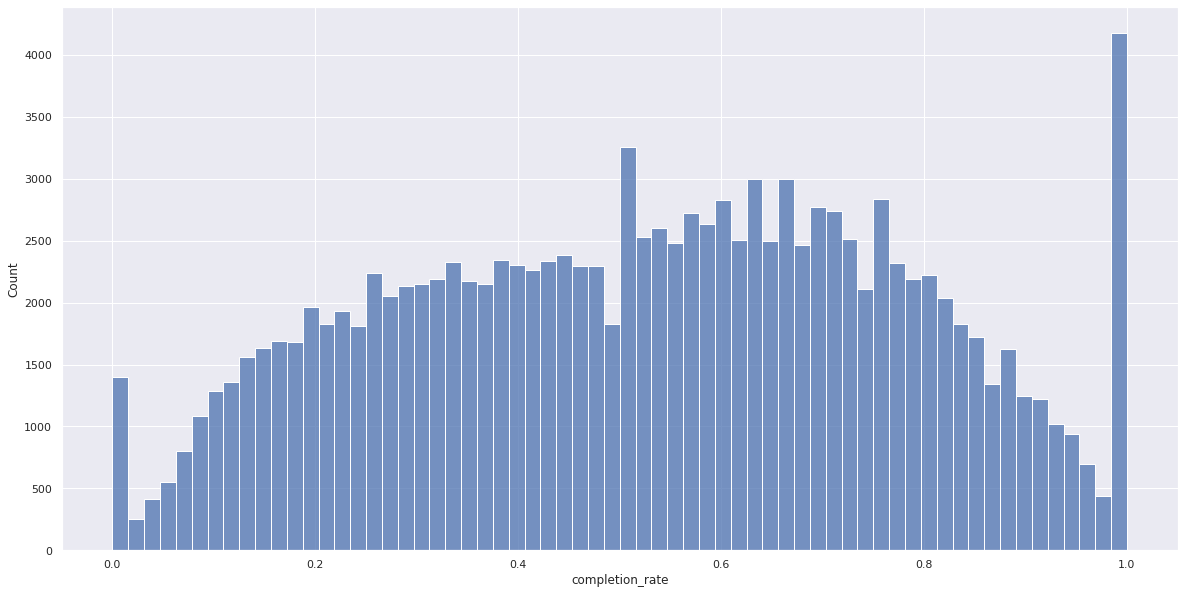

In [12]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='completion_rate',
             data=full_df)

In [13]:
full_df = inst_abv_0_group_avg(full_df)
full_df = state_group_avg(full_df)
for col in full_df.columns:
    print(col, full_df[col].isna().sum())

INSTNM 0
MAIN 0
NUMBRANCH 0
PREDDEG 0
HIGHDEG 0
PCIP01 0
PCIP03 0
PCIP04 0
PCIP05 0
PCIP09 0
PCIP10 0
PCIP11 0
PCIP12 0
PCIP13 0
PCIP14 0
PCIP15 0
PCIP16 0
PCIP19 0
PCIP22 0
PCIP23 0
PCIP24 0
PCIP25 0
PCIP26 0
PCIP27 0
PCIP29 0
PCIP30 0
PCIP31 0
PCIP38 0
PCIP39 0
PCIP40 0
PCIP41 0
PCIP42 0
PCIP43 0
PCIP44 0
PCIP45 0
PCIP46 0
PCIP47 0
PCIP48 0
PCIP49 0
PCIP50 0
PCIP51 0
PCIP52 0
PCIP54 0
UGDS 0
TUITFTE 0
INEXPFTE 0
PCTPELL 0
PCTFLOAN 0
AGE_ENTRY 0
VETERAN 46
FIRST_GEN 0
POVERTY_RATE 0
UNEMP_RATE 0
OPENADMP 0
LPSTAFFORD_CNT 140
LPSTAFFORD_AMT 140
LPPPLUS_CNT 140
LPPPLUS_AMT 140
year 0
STABBR 0
avg_cost 0
completion_rate 0


In [14]:
full_df.dropna(inplace=True)

In [15]:
full_df['avg_stafford'] = full_df['LPSTAFFORD_AMT'] / full_df['LPSTAFFORD_CNT']
full_df['avg_plus'] = full_df['LPPPLUS_AMT'] / full_df['LPPPLUS_CNT']
full_df = full_df.drop(['LPSTAFFORD_AMT', 'LPSTAFFORD_CNT', 'LPPPLUS_AMT', 'LPPPLUS_CNT', 'STABBR', 'year', 'INSTNM'], axis=1)

In [16]:
full_df.shape

(149519, 57)

In [17]:
full_df = full_df.loc[full_df['completion_rate'] > 0]

In [43]:
# clean_full_df = pd.get_dummies(full_df, columns=['PREDDEG', 'HIGHDEG'])
clean_full_df= full_df.copy()

<AxesSubplot:>

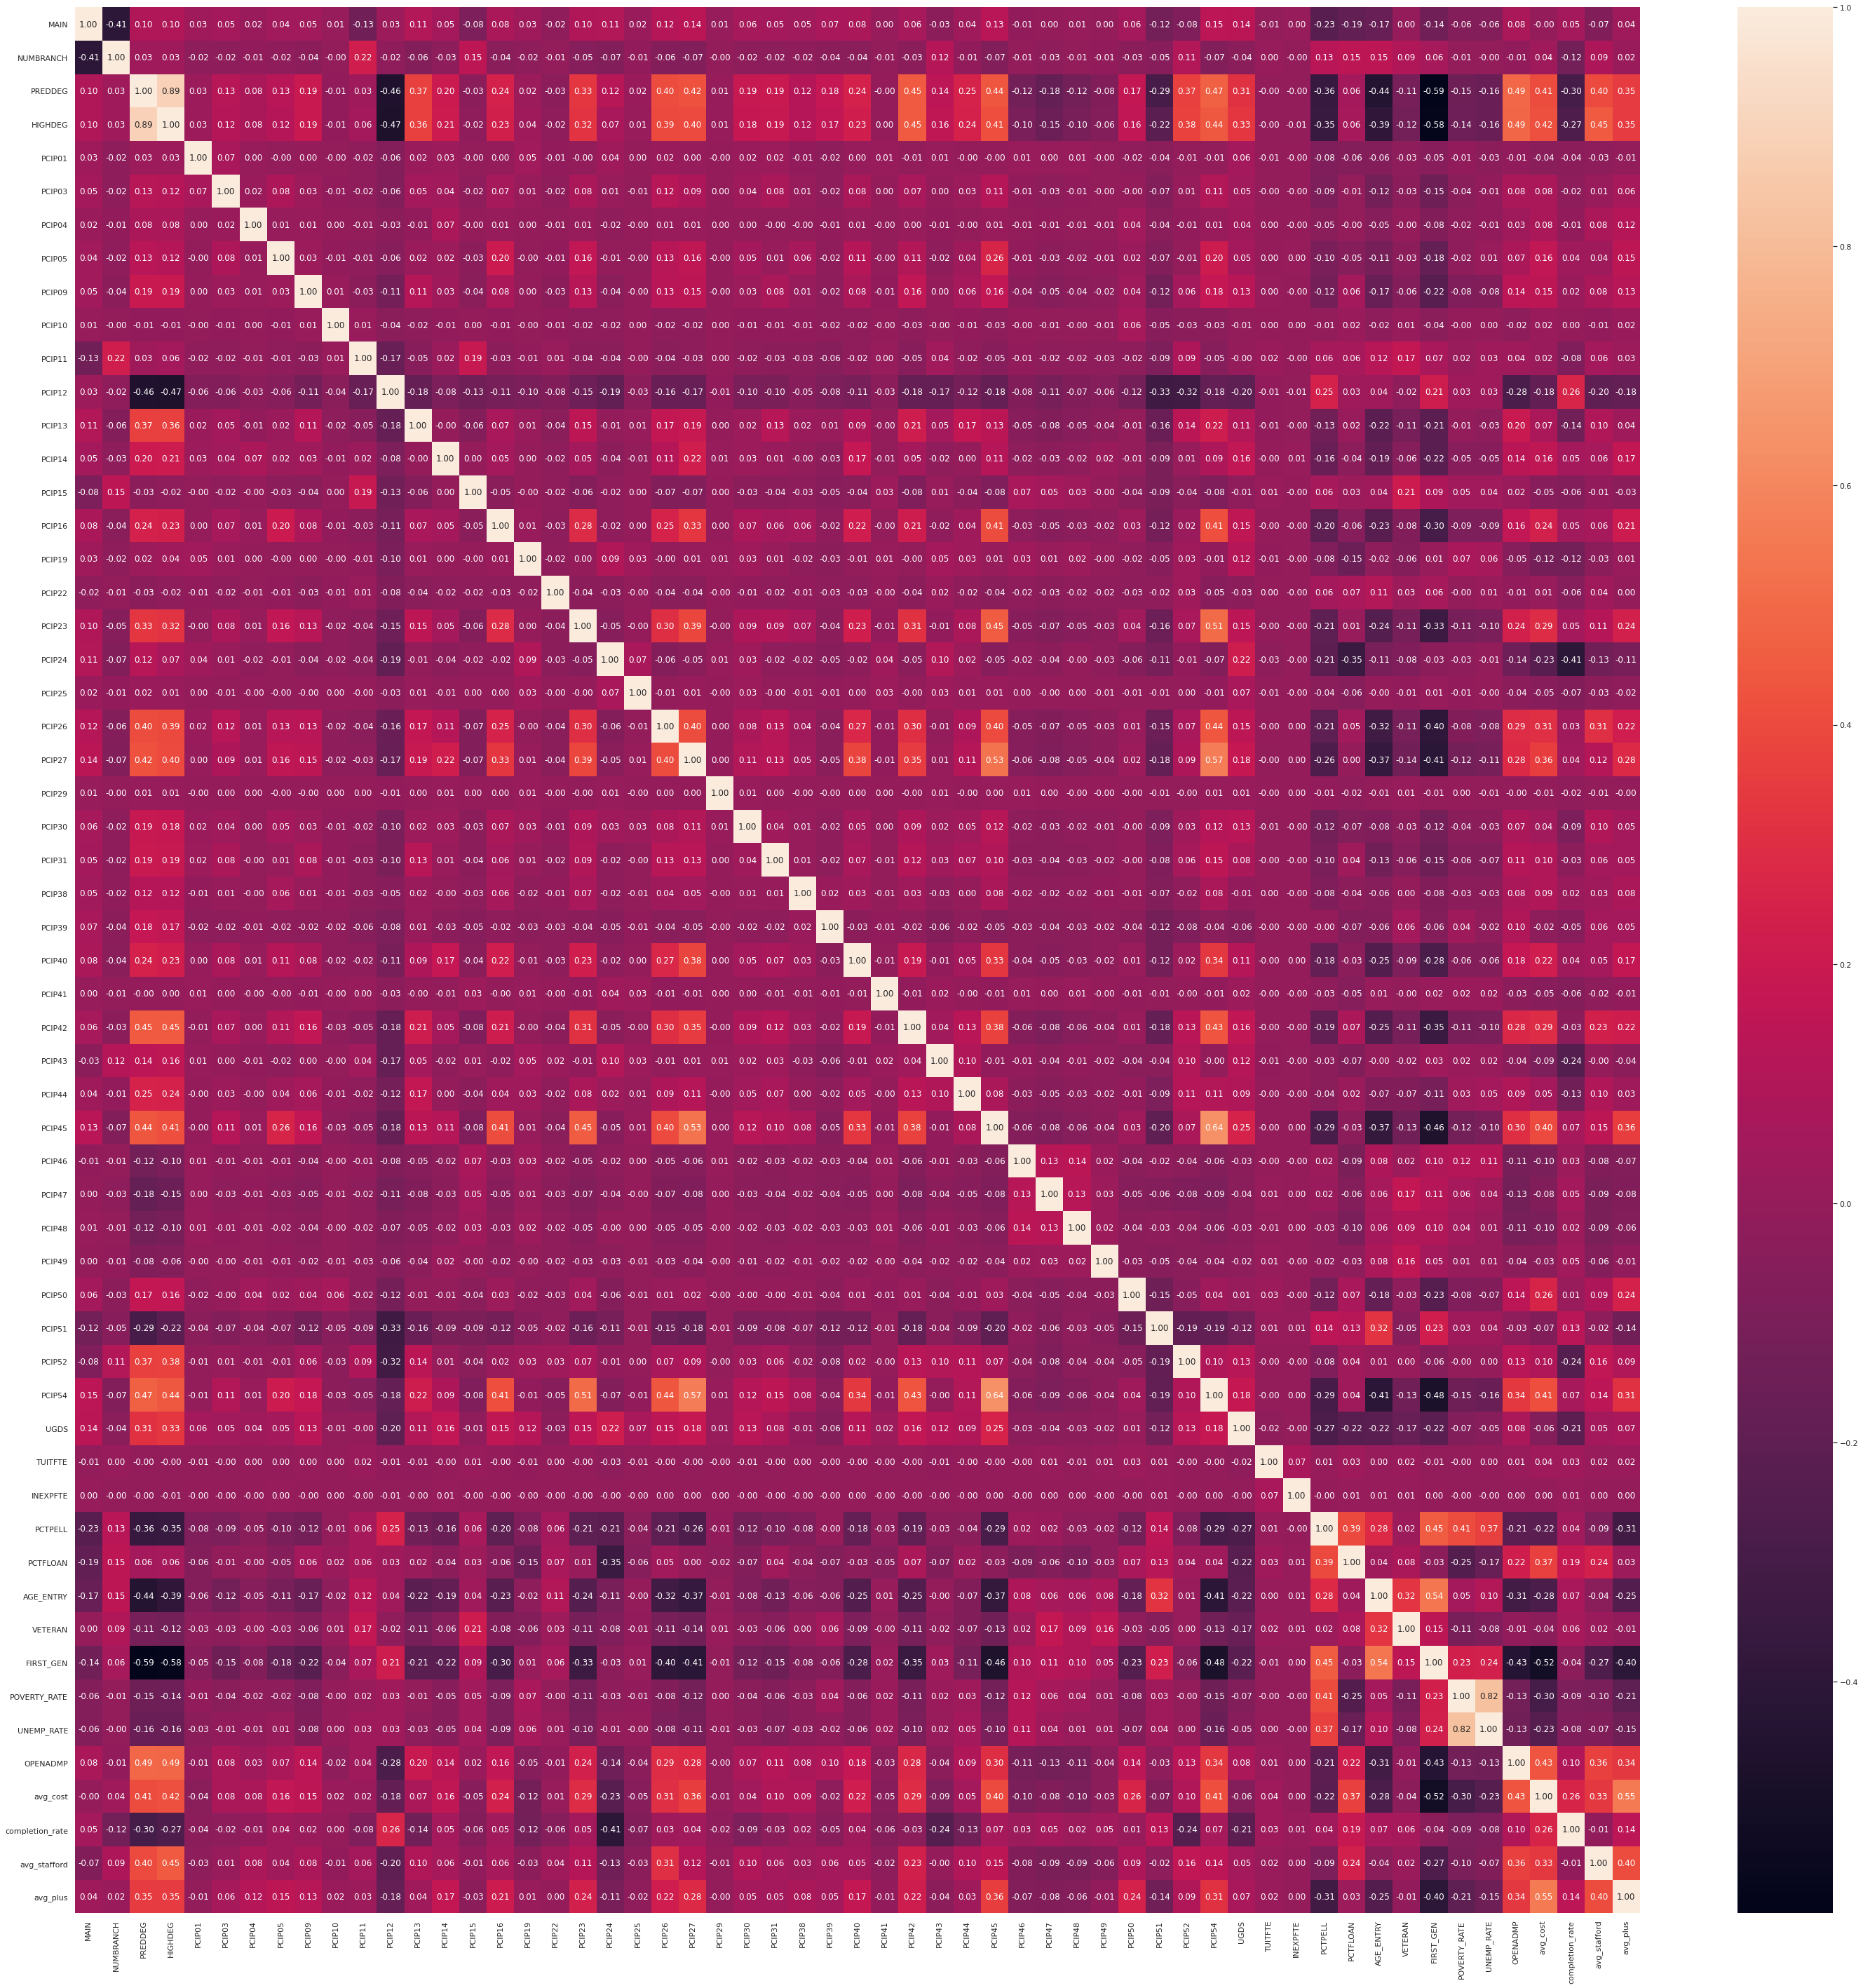

In [44]:
sns.set(rc={'figure.figsize':(50,50)})
sns.heatmap(clean_full_df.corr(),annot=True, fmt=".2f")

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import time

In [46]:
seed = 123456
X, y = clean_full_df.drop('completion_rate', axis=1), np.array(clean_full_df['completion_rate'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed)

In [47]:
%%time
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=seed, n_jobs=-1)
m = forest.fit(X_train, y_train)

CPU times: user 6min 53s, sys: 2.63 s, total: 6min 56s
Wall time: 37 s


In [48]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.137 seconds


In [49]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123456,
 'verbose': 0,
 'warm_start': False}

In [50]:
y_pred = m.predict(X_test)

In [51]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Accuracy:', round(100*(1 - metrics.mean_absolute_percentage_error(y_test, y_pred)), 2))

Mean Absolute Error (MAE): 0.08030996696380661
Mean Squared Error (MSE): 0.01444835499482905
Root Mean Squared Error (RMSE): 0.12020131028748834
Mean Absolute Percentage Error (MAPE): 0.2641750712251851
Explained Variance Score: 0.7512368834095235
Max Error: 0.8865083472222222
Mean Squared Log Error: 0.006164107978063775
Median Absolute Error: 0.05045570185436718
R^2: 0.7512232655478798
Accuracy: 73.58


<AxesSubplot:xlabel='completion_rate', ylabel='Count'>

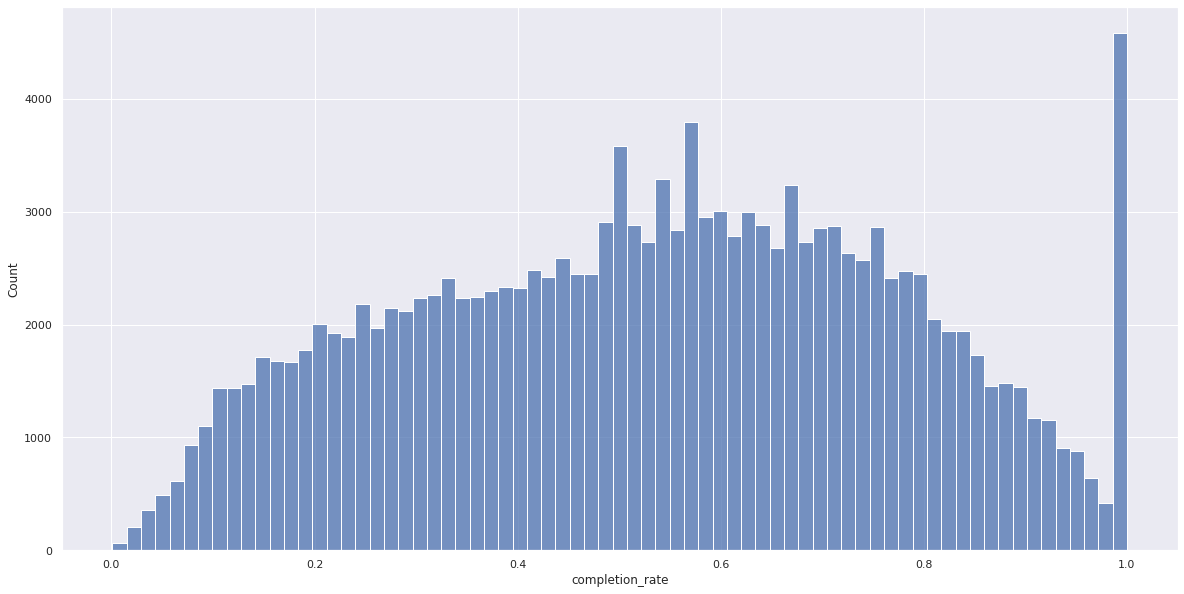

In [52]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='completion_rate',
             data=clean_full_df)

In [53]:
clean_full_df.shape

(148200, 57)

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [68]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=seed, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
CPU times: user 1min 30s, sys: 735 ms, total: 1min 31s
Wall time: 3min 4s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [150, 161, 172, 183,
                                                         194, 205, 216, 227,
                                                         238, 250]},
                   random_state=123456, verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 194,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 27,
 'bootstrap': False}

In [70]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = round(100*(1 - metrics.mean_absolute_percentage_error(y_test, y_pred)), 2)
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
    print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
    print('Max Error:', metrics.max_error(y_test, y_pred))
    print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
    print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
    print('R^2:', metrics.r2_score(y_test, y_pred))
    print('Accuracy:', accuracy)
    return accuracy
    
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Mean Absolute Error (MAE): 0.08582602446041508
Mean Squared Error (MSE): 0.01606958250780087
Root Mean Squared Error (RMSE): 0.12676585702704365
Mean Absolute Percentage Error (MAPE): 0.2766208897938112
Explained Variance Score: 0.7233119959221019
Max Error: 0.875035625
Mean Squared Log Error: 0.0068383150497330035
Median Absolute Error: 0.05516999999999994
R^2: 0.7233084138830772
Accuracy: 72.34


In [71]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Mean Absolute Error (MAE): 0.07881406601724816
Mean Squared Error (MSE): 0.013908524261808405
Root Mean Squared Error (RMSE): 0.11793440660726795
Mean Absolute Percentage Error (MAPE): 0.2614797404112202
Explained Variance Score: 0.7605363688704703
Max Error: 0.8999746865233774
Mean Squared Log Error: 0.005933411705667933
Median Absolute Error: 0.05009531624844902
R^2: 0.7605182563593482
Accuracy: 73.85


In [72]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.09%.
